In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import seaborn as sns
import load_data as ld
import classes as cl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import functions as f
import pandas as pd

## Logistic Regression code for simple data

In [2]:
X, y, x, a_true = ld.load_simple_data()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(X.shape, y.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scale and center the data
X_train, X_test = f.scale_train_test(train = X_train, test = X_test)
y_train, y_test = f.scale_train_test(train = y_train, test = y_test)

learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
lambda_reg = 0.00001
n_iter = 1000
mse_list = []
r2_list = []

for lr in learning_rates:
    model = cl.LogisticRegressionGD(learning_rate=lr, n_iter=n_iter, lambda_reg=lambda_reg)
    cost_history = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = f.mse(y_test, y_pred)
    r2 = f.r2(y_test, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)
    print(f"Learning Rate: {lr}, Mse: {mse:.4f}")
    print(f"Learning Rate: {lr}, R2: {r2:.4f}")


(100, 3) (100, 1)
Shape of X_train: (80, 3)
Shape of X_test: (20, 3)
Shape of y_train: (80, 1)
Shape of y_test: (20, 1)
Learning Rate: 1e-05, Mse: 2.2164
Learning Rate: 1e-05, R2: -0.0254
Learning Rate: 0.0001, Mse: 2.1285
Learning Rate: 0.0001, R2: 0.0152
Learning Rate: 0.001, Mse: 1.6812
Learning Rate: 0.001, R2: 0.2222
Learning Rate: 0.01, Mse: 1.2930
Learning Rate: 0.01, R2: 0.4018
Learning Rate: 0.1, Mse: 1.2883
Learning Rate: 0.1, R2: 0.4040


/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/FYS-STK4155_project2/src/notebooks/../classes.py:313: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / N) * (y.T @ np.log(p) + (1 - y).T @ np.log(1 - p))
/home/jonasbaa/Pictures/OneDrive/UiO/Masters degree/Semester 1/FYS-STK4155 Anvendt dataanalyse og maskinlæring/FYS-STK4155_project2/src/notebooks/../classes.py:313: RuntimeWarning: invalid value encountered in matmul
  cost = (-1 / N) * (y.T @ np.log(p) + (1 - y).T @ np.log(1 - p))


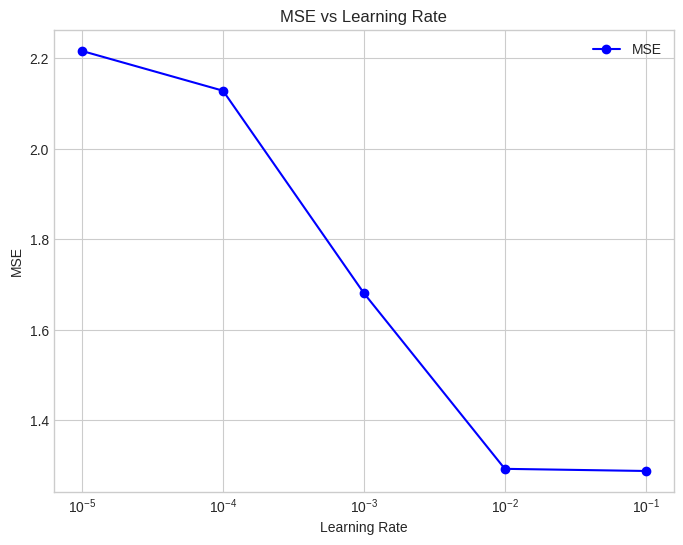

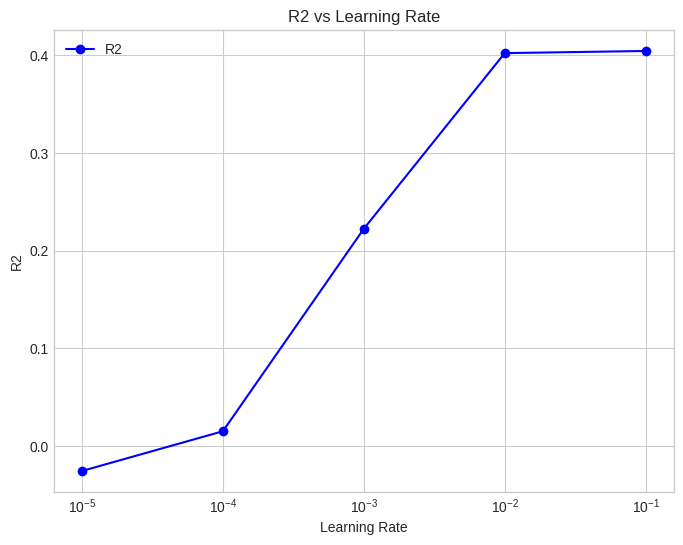

In [3]:
f.plot_metric_vs_learning_rate(learning_rates, mse_list, 'MSE', 'Learning Rate', 'MSE vs Learning Rate')
f.plot_metric_vs_learning_rate(learning_rates, r2_list, 'R2', 'Learning Rate', 'R2 vs Learning Rate')

In [4]:
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate = 0.00001

mse_list = []
r2_list = []

for lam in lambda_values:
    model = cl.LogisticRegressionGD(learning_rate=learning_rate, n_iter=n_iter, lambda_reg=lam)
    cost_history = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = f.mse(y_test, y_pred)
    r2 = f.r2(y_test, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)
    print(f"Lambda: {lam}, Mse: {mse:.4f}")
    print(f"Lambda: {lam}, R2: {r2:.4f}")


Lambda: 1e-05, Mse: 2.2164
Lambda: 1e-05, R2: -0.0254
Lambda: 0.0001, Mse: 2.2164
Lambda: 0.0001, R2: -0.0254
Lambda: 0.001, Mse: 2.2164
Lambda: 0.001, R2: -0.0254
Lambda: 0.01, Mse: 2.2164
Lambda: 0.01, R2: -0.0254
Lambda: 0.1, Mse: 2.2164
Lambda: 0.1, R2: -0.0254


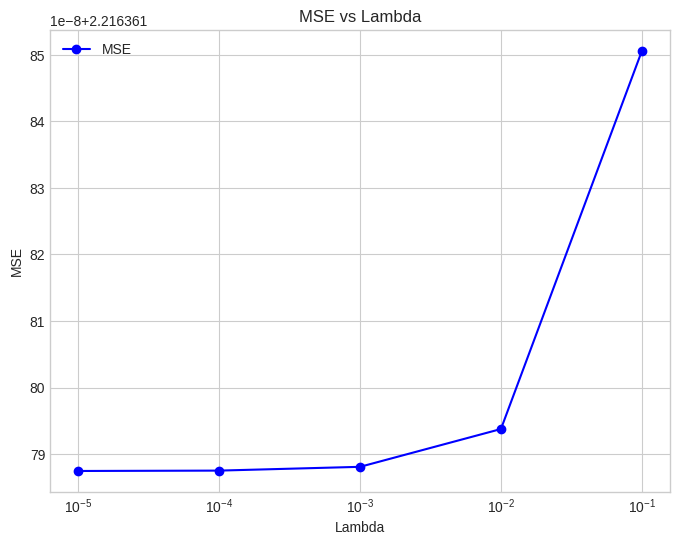

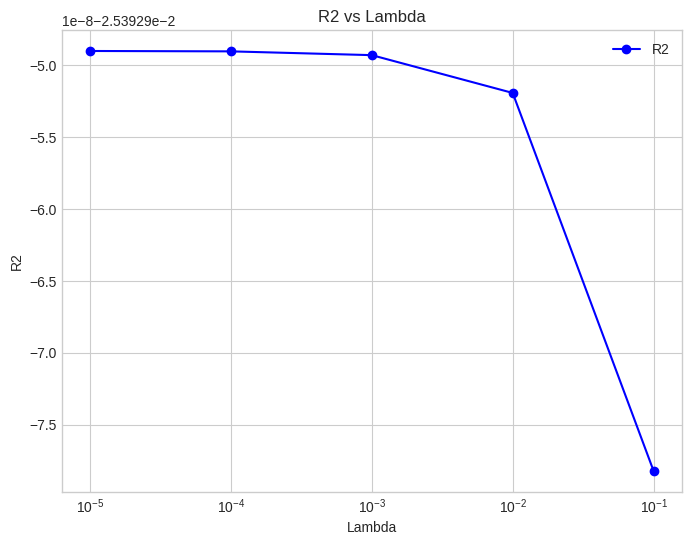

In [5]:
f.plot_metric_vs_learning_rate(lambda_values, mse_list, 'MSE', 'Lambda', 'MSE vs Lambda')
f.plot_metric_vs_learning_rate(lambda_values, r2_list, 'R2', 'Lambda', 'R2 vs Lambda')

## Logistic Classification code for Wisconsin data

In [6]:
X, y = ld.load_wisconsin_data()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Scale and center the data
X_train, X_test = f.scale_train_test(train = X_train, test = X_test)

learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
lambda_reg = 0.00001
n_iter = 1000
accuracy_list = []

for lr in learning_rates:
    model = cl.LogisticRegressionGD(learning_rate=lr, n_iter=n_iter, lambda_reg=lambda_reg)
    cost_history = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    threshold = 0.5
    y_pred_class = np.where(y_pred >= threshold, 1, 0)
    accuracy = accuracy_score(y_pred_class, y_test)
    accuracy_list.append(accuracy)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy:.4f}")


Shape of X_train: (455, 2)
Shape of X_test: (114, 2)
Shape of y_train: (455, 1)
Shape of y_test: (114, 1)
Learning Rate: 1e-05, Accuracy: 0.8860
Learning Rate: 0.0001, Accuracy: 0.8860
Learning Rate: 0.001, Accuracy: 0.8860
Learning Rate: 0.01, Accuracy: 0.8684
Learning Rate: 0.1, Accuracy: 0.8947


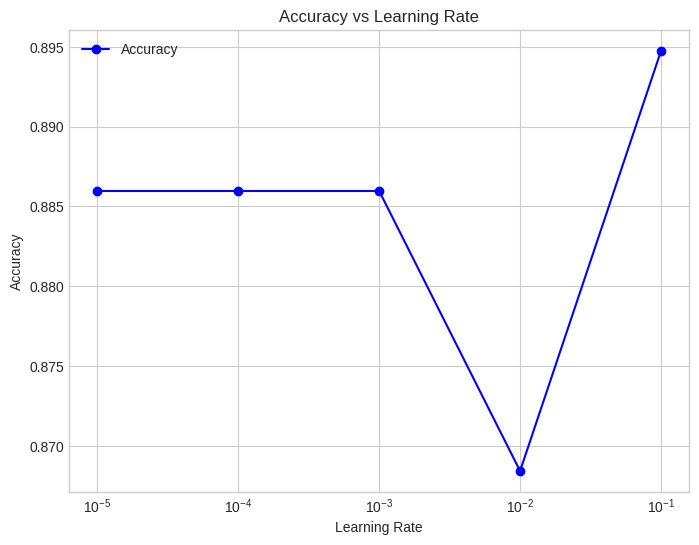

In [7]:
f.plot_metric_vs_learning_rate(learning_rates, accuracy_list, 'Accuracy', 'Learning Rate', 'Accuracy vs Learning Rate')

In [8]:
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate = 0.00001

accuracy_list = []

for lam in lambda_values:
    model = cl.LogisticRegressionGD(learning_rate=learning_rate, n_iter=n_iter, lambda_reg=lam)
    cost_history = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    threshold = 0.5
    y_pred_class = np.where(y_pred >= threshold, 1, 0)
    accuracy = accuracy_score(y_pred_class, y_test)
    accuracy_list.append(accuracy)
    print(f"Lambda value: {lam}, Accuracy: {accuracy:.4f}")

Lambda value: 1e-05, Accuracy: 0.8860
Lambda value: 0.0001, Accuracy: 0.8860
Lambda value: 0.001, Accuracy: 0.8860
Lambda value: 0.01, Accuracy: 0.8860
Lambda value: 0.1, Accuracy: 0.8860


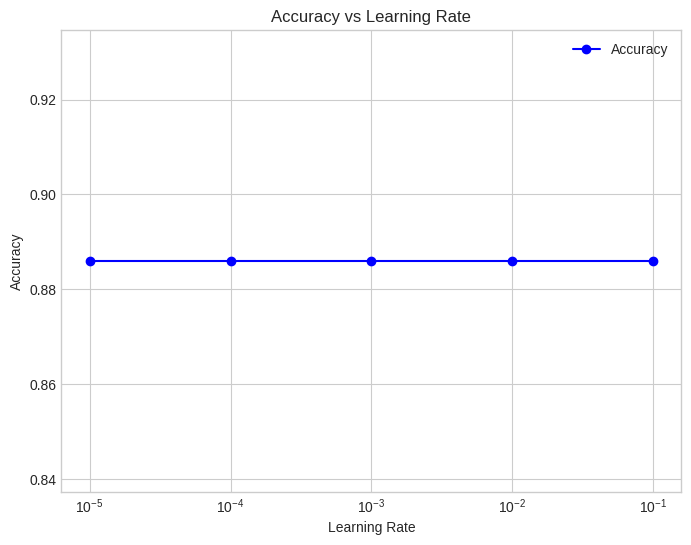

In [9]:
f.plot_metric_vs_learning_rate(lambda_values, accuracy_list, 'Accuracy', 'Learning Rate', 'Accuracy vs Learning Rate')